# IE582 Homework 1: Analysis of Antenna Design Using Machine Learning Techniques

In this homework, I analyze the design parameters of antennas to understand how they influence the S11 response, an essential measure of antenna performance in electromagnetic behavior. The goal is to use machine learning techniques to reduce the complexity of the design space, model the S11 response, and derive insights for antenna design optimization.

This report is divided into two sections: Dimensionality Reduction with Principal Component Analysis (PCA) and Linear Regression Modeling for S11. PCA is used to reduce the dimensionality of the design parameters to identify key parameters that most significantly impact antenna behavior. Linear regression models are then applied to predict the S11 response at selected frequencies based on the reduced design space.

## Part 1: Dimensionality Reduction with Principal Component Analysis (PCA)
In this section, I aim to use Principal Component Analysis to minimize the dimensionality of the input parameters in order to make the design space less complex. By identifying the most influential design parameters, the model can be potentially simplified while keeping the majority of information that impacts the antenna’s S11 response. PCA provides us the amount of variation represented by each main component, so it exposes underlying patterns in the design parameters.

### Research Questions
1. **Can we reduce the complexity of the design space by using Principal Component Analysis (PCA) to identify key parameters that most influence the S11 response of the antenna?**
2. **How much of the total variance in the design parameter space can be explained by the principal components?**
3. **What insights can we draw from the PCA regarding the relationship between geometry and electromagnetic behavior?**

I start with importing the required libraries and loading the data files. 

In [193]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [195]:
# Load data files
input_data = pd.read_csv('C:/Users/ecem_/OneDrive/Masaüstü/hw1_files/hw1_input.csv')
real_data = pd.read_csv('C:/Users/ecem_/OneDrive/Masaüstü/hw1_files/hw1_real.csv')
img_data = pd.read_csv('C:/Users/ecem_/OneDrive/Masaüstü/hw1_files/hw1_img.csv')

I also calculated S11 magnitudes using real and imaginary parts. 

In [197]:
s11_magnitude = np.sqrt(real_data**2 + img_data**2)

#### Preliminary Research

I performed preliminary research to become familiar with the dataset and analyzed the first five rows to obtain a basic knowledge of it. I used histograms to illustrate the design parameter distribution and a correlation heatmap to evaluate the relationships between the parameters. In order to better understand the structure and properties of the data, I also plotted the S11 magnitude across frequencies for a few sample designs.

In [10]:
display(input_data.head())
display(real_data.head())
display(img_data.head())
display(s11_magnitude.head())

,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
0,3.202024,2.288742,0.012514,0.139247,0.041757,0.028566,0.000549,0.032403,0.348140,3.735926,4.278575
1,2.107848,2.895504,0.037171,0.149492,0.056775,0.028930,0.005536,0.053647,0.326369,4.929862,4.876068
2,3.252113,4.818411,0.025432,0.578834,0.029972,0.030922,0.020274,0.049845,0.446639,4.772670,4.745106
3,4.161509,2.294309,0.011058,0.117266,0.093223,0.017604,0.001135,0.098610,0.055665,4.102438,3.755671
4,4.820912,2.948325,0.019658,0.163503,0.094337,0.025757,0.021725,0.072813,0.272282,2.531031,3.047553


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.649471,0.608623,0.563770,0.515485,0.464365,0.411022,0.356056,0.300044,0.243525,0.186992,...,-0.895451,-0.894250,-0.893045,-0.891835,-0.890620,-0.889402,-0.888178,-0.886951,-0.885718,-0.884482
1,-0.684443,-0.680926,-0.677355,-0.673727,-0.670041,-0.666296,-0.662491,-0.658624,-0.654692,-0.650696,...,-0.835303,-0.832276,-0.829209,-0.826105,-0.822965,-0.819791,-0.816584,-0.813346,-0.810078,-0.806782
2,0.670194,0.678183,0.685886,0.693294,0.700399,0.707191,0.713661,0.719799,0.725595,0.731037,...,0.693171,0.675653,0.656992,0.637113,0.615936,0.593384,0.569383,0.543870,0.516796,0.488139
3,-0.856026,-0.854962,-0.853892,-0.852815,-0.851731,-0.850642,-0.849545,-0.848442,-0.847333,-0.846217,...,-0.115205,-0.096197,-0.076456,-0.055953,-0.034660,-0.012550,0.010402,0.034219,0.058921,0.084521
4,-0.952876,-0.951901,-0.950906,-0.949892,-0.948860,-0.947811,-0.946747,-0.945668,-0.944575,-0.943469,...,-0.692349,-0.690720,-0.689088,-0.687453,-0.685813,-0.684171,-0.682524,-0.680874,-0.679221,-0.677564


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,-0.435160,-0.493311,-0.547391,-0.597047,-0.642027,-0.682178,-0.717442,-0.747848,-0.773501,-0.794570,...,0.418737,0.421368,0.423987,0.426592,0.429186,0.431767,0.434335,0.436892,0.439437,0.441969
1,0.710936,0.714041,0.717157,0.720283,0.723419,0.726566,0.729724,0.732892,0.736070,0.739259,...,0.442050,0.449451,0.456720,0.463863,0.470884,0.477786,0.484573,0.491249,0.497816,0.504278
2,0.549842,0.537964,0.525835,0.513455,0.500828,0.487957,0.474844,0.461492,0.447904,0.434083,...,-0.518546,-0.534209,-0.549582,-0.564575,-0.579078,-0.592957,-0.606054,-0.618175,-0.629093,-0.638543
3,0.507327,0.509092,0.510857,0.512623,0.514389,0.516156,0.517923,0.519690,0.521459,0.523228,...,0.928563,0.927782,0.926488,0.924621,0.922114,0.918892,0.914873,0.909964,0.904064,0.897060
4,0.249540,0.254110,0.258618,0.263062,0.267447,0.271772,0.276041,0.280253,0.284410,0.288515,...,0.705500,0.707018,0.708531,0.710037,0.711538,0.713034,0.714523,0.716007,0.717486,0.718958


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.781778,0.783440,0.785795,0.788790,0.792359,0.796433,0.800936,0.805793,0.810930,0.816277,...,0.988520,0.988551,0.988581,0.988610,0.988638,0.988664,0.988690,0.988714,0.988737,0.988759
1,0.986860,0.986669,0.986470,0.986263,0.986048,0.985824,0.985592,0.985350,0.985100,0.984839,...,0.945061,0.945880,0.946669,0.947428,0.948158,0.948861,0.949537,0.950188,0.950814,0.951417
2,0.866883,0.865643,0.864258,0.862724,0.861039,0.859198,0.857199,0.855036,0.852705,0.850202,...,0.865665,0.861328,0.856551,0.851268,0.845404,0.838870,0.831564,0.823368,0.814148,0.803752
3,0.995069,0.995055,0.995041,0.995025,0.995009,0.994991,0.994973,0.994953,0.994933,0.994912,...,0.935682,0.932755,0.929637,0.926312,0.922765,0.918978,0.914932,0.910607,0.905982,0.901033
4,0.985009,0.985235,0.985447,0.985645,0.985831,0.986005,0.986169,0.986321,0.986464,0.986597,...,0.988472,0.988418,0.988361,0.988304,0.988244,0.988183,0.988121,0.988057,0.987991,0.987924


- Histogram of the Design Parameters

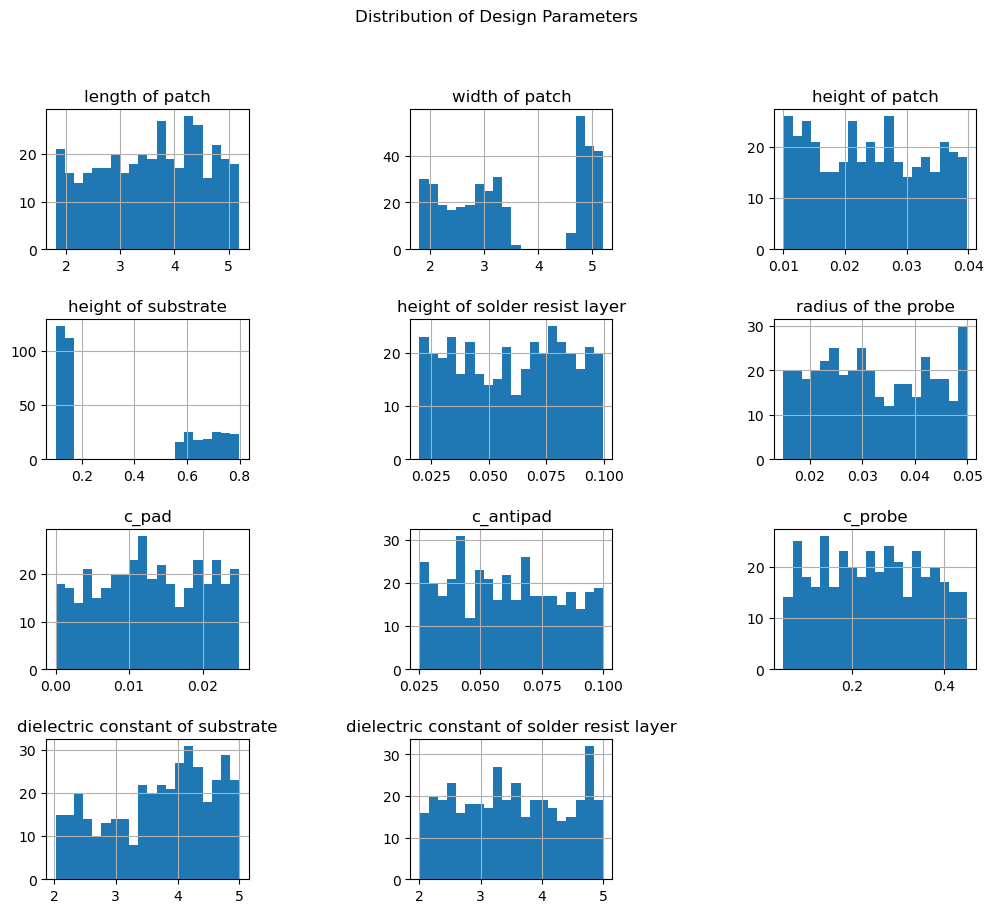

In [227]:
# Histogram of the Design Parameters
input_data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Design Parameters")
plt.subplots_adjust(hspace=0.5, wspace=0.8)  
plt.show()


The histogram plots provide a visual representation of the distribution of each design parameter. Some parameters, like the height of substrate, show a skewed distribution with a majority of values concentrated at lower levels. Others, like height of patch and radius of the probe, have a more even distribution across their ranges.

- Correlation Heatmap of Design Parameters

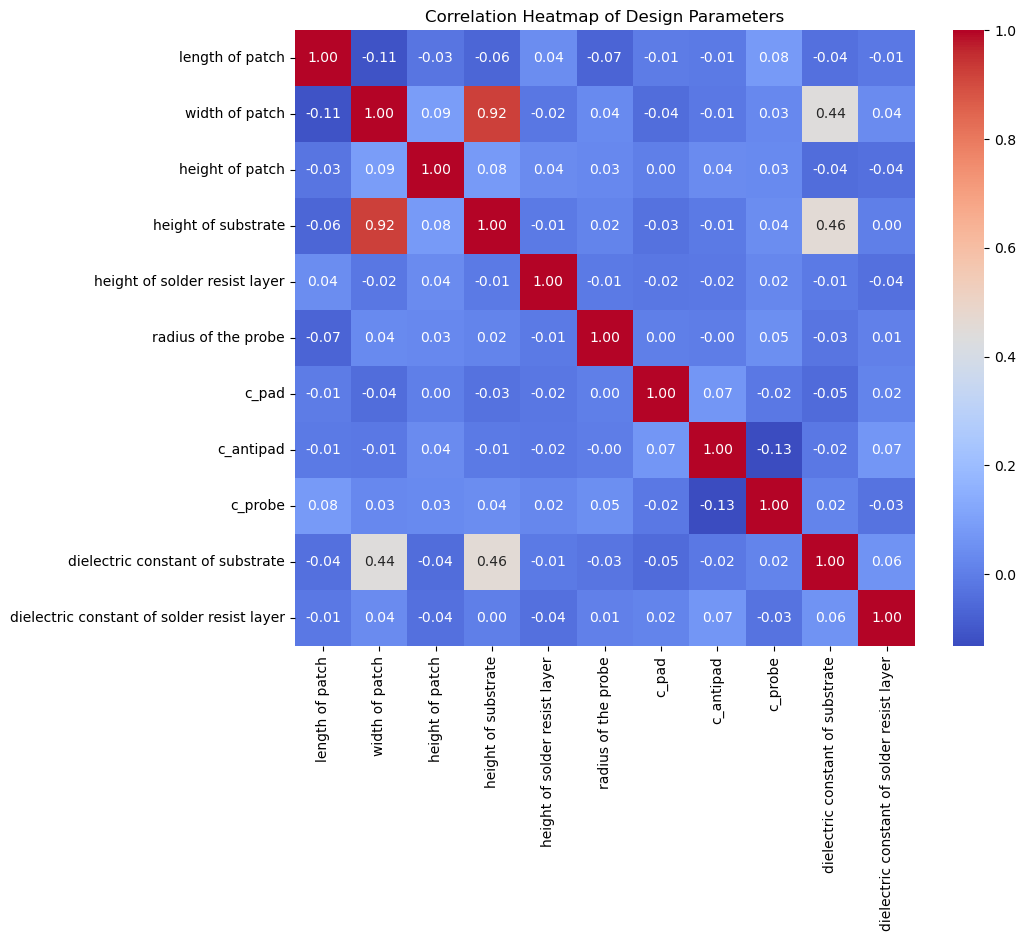

In [215]:
# Correlation Heatmap of Design Parameters
plt.figure(figsize=(10, 8))
sns.heatmap(input_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Design Parameters")
plt.show()

The correlation heatmap shows the relationships between the design parameters. There is a strong correlation (0.92) between width of patch and height of substrate, suggesting multicollinearity between these two features. Such high correlation can impact the reliability of regression models. It’s possible they might both impact the performance similarly, and PCA might combine them into a single component. There are some moderate correlations, such as between the height of substrate and dielectric constant of substrate (0.46) or dielectric constants of substrate and width of patch (0.44).  These relationships are not negligible but aren’t strongly coupled. They may slightly influence each other but still provide unique information. Other than these, most parameters are weakly correlated, meaning that many design parameters do not directly influence each other. This independence might be helpful in PCA, since it implies that several parameters provide distinct information to the design with little repetition.

- S11 Magnitude Across Frequencies for Sample Designs

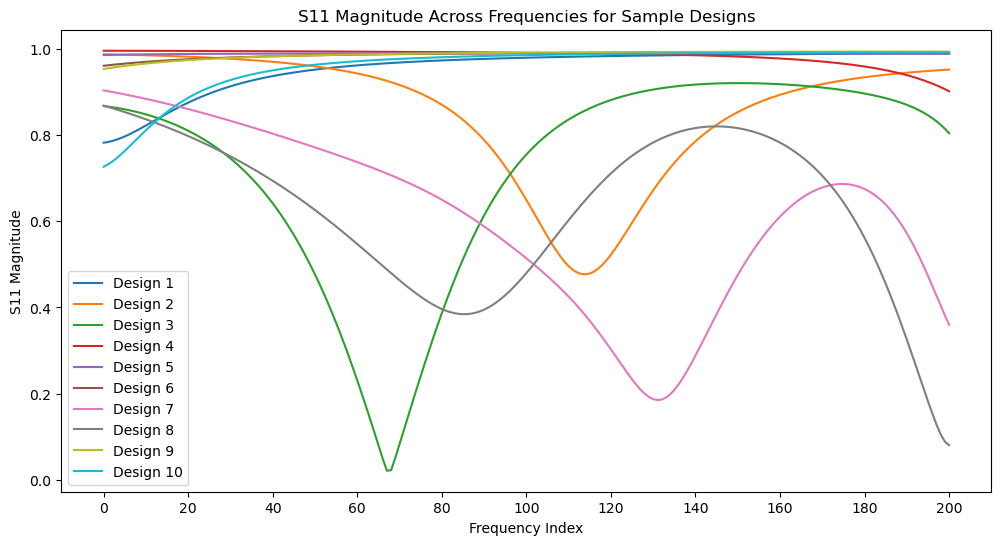

In [229]:
# S11 Magnitude Calculation and Plotting
plt.figure(figsize=(12, 6))
for i in range(10):  # Plot the first 10 designs as an example
    plt.plot(s11_magnitude.iloc[i, :], label=f'Design {i+1}')
    
plt.xlabel("Frequency Index")
plt.ylabel("S11 Magnitude")
plt.title("S11 Magnitude Across Frequencies for Sample Designs")
plt.xticks(ticks=range(0, len(s11_magnitude.columns), 20))
plt.legend()
plt.show()

A resonance point is a frequency where the antenna is most efficient at transmitting signals. This is indicated by a low S11 magnitude, as it means very little of the signal is being reflected and most of it is being transmitted.

In the green curve (Design 3), there is a clear dip around the frequency index ~70 where the S11 magnitude approaches zero. This means that at this frequency, Design 3 is in resonance, and it transmits signals with minimal reflection, making it highly efficient at this specific frequency.

Other designs, like those in orange, pink, and gray, also show dips at different frequency points, indicating their resonance frequencies. These dips represent the frequencies at which each design is most effective.

#### Application of PCA

- Standardization
Standardization is essential before applying PCA because PCA is sensitive to the scales of the data. If the features have different scales, features with larger scales will dominate the variance. Standardizing the data  ensures that each feature contributes equally to the analysis.

In [231]:
scaler = StandardScaler()
input_scaled = scaler.fit_transform(input_data)

Let's check whether the normalized data has a mean of zero and a standard deviation of one.

In [233]:
np.mean(input_scaled),np.std(input_scaled)

(-3.858909780987557e-17, 1.0)

In [235]:
# Apply PCA to the standardized data
pca_input = PCA(n_components=11)  # since we have 11 design parameters
# Fit & Transform the data to principal components
principalcomponents_input = pca_input.fit_transform(input_scaled)

- Explained Variance of Principal Components

We need to identify how many principal components capture most of the variance in the design parameter space to reduce complexity. By plotting the explained variance, we can determine the number of components required. Additionally, we can create a data frame that includes the Standard Deviation, Proportion of Variance, and Cumulative Proportion of the principal components for further analysis.

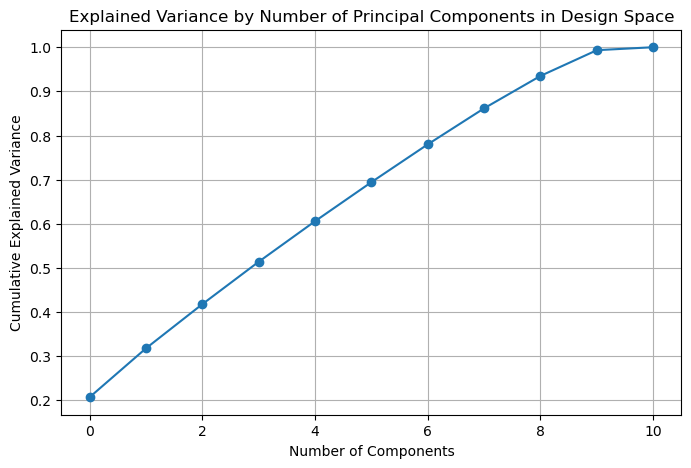

In [237]:
# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca_input.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components in Design Space')
plt.grid()
plt.show()


In [239]:
# Create a DataFrame to summarize explained variance
explained_variance_df = pd.DataFrame({
    'Standard Deviation': np.sqrt(pca_input.explained_variance_),
    'Proportion of Variance': pca_input.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pca_input.explained_variance_ratio_)
}, index=[f'PC{i+1}' for i in range(len(pca_input.explained_variance_))])

# Display the explained variance DataFrame
print("Explained Variance of Principal Components:")
explained_variance_df

Explained Variance of Principal Components:


,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,1.511497,0.207153,0.207153
PC2,1.104972,0.110708,0.317862
PC3,1.050351,0.100034,0.417896
PC4,1.029344,0.096072,0.513968
PC5,1.006584,0.091871,0.605839
PC6,0.987712,0.088458,0.694297
PC7,0.971958,0.085659,0.779956
PC8,0.948944,0.081651,0.861607
PC9,0.899715,0.073399,0.935005
PC10,0.801873,0.058303,0.993308


This cumulative explained variance plot and table provide insights into how much of the total variance in the design parameters is captured by each successive principal component.

The standard deviation associated with each principal component indicates the extent to which each component captures variation in the design parameters. Components with higher standard deviations, like PC1, capture more of the design space's complexity, while those with lower values contribute less.

The first principal component (PC1) alone captures around 20.7% of the total variance, and 41.8% of the variance is explained by the first three components (PC1, PC2, and PC3). By extending this to the first six components, we are able to maintain almost 69% of the variation, and by the time we reach the first eight components, we have over 85% of the entire variance. This pattern shows that by focusing on the first 7–8 principal components, which account for a significant amount of the variation, we may efficiently minimize the complexity of the design parameter space. 8 principal components are selected for further analysis and applications. 

- Loadings (Influence of Each Parameter on Principal Components)

We can analyze the contributions of each parameter to each principle component in order to learn more about the relationship between geometry and electromagnetic behavior from the PCA. We can determine which geometric elements have the most impact on the total variance in the data by examining the corresponding weights of each design parameter on the principal components. Through this approach we can see how specific geometric features of the antenna design affect changes in the electromagnetic response, making it easier to understand the relationship between the design parameters and the S11 behavior.

In [241]:
# Create a DataFrame for the loadings
loadings = pd.DataFrame(pca_input.components_.T, columns=[f'PC{i+1}' for i in range(len(pca_input.explained_variance_))], index=input_data.columns)
print("Loadings (Influence of Each Parameter on Principal Components):")
loadings


Loadings (Influence of Each Parameter on Principal Components):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
length of patch,-0.101327,0.315409,-0.369645,0.376883,0.409833,0.073314,-0.253331,0.454266,-0.406238,-0.036934,-0.036141
width of patch,0.624178,-0.009718,0.040766,0.039631,0.012169,-0.032326,0.000413,0.022090,-0.040157,-0.328516,-0.704172
height of patch,0.071054,0.055716,0.620460,0.392974,0.017701,0.069714,-0.490098,-0.317943,-0.216559,0.243013,0.006071
height of substrate,0.624137,0.018824,0.016441,0.076518,0.028012,-0.060565,0.002837,0.059481,-0.038186,-0.305362,0.708004
height of solder resist layer,-0.021049,0.266259,0.086417,0.510652,-0.124629,0.459841,0.647199,-0.110408,0.040184,-0.027430,-0.004432
radius of the probe,0.025997,0.002815,0.548381,-0.454397,0.218986,0.304908,0.212779,0.491478,-0.240280,0.080764,0.010532
c_pad,-0.054228,-0.265990,0.144827,0.177533,0.580059,-0.547579,0.429976,-0.174386,-0.140321,0.049041,-0.010954
c_antipad,-0.018720,-0.559499,0.088323,0.373926,0.127759,0.172140,-0.138146,0.415883,0.548589,-0.000574,-0.006460
c_probe,0.039213,0.564753,0.093131,-0.151004,0.487544,0.016285,-0.102528,-0.129279,0.618694,0.000912,-0.008289
dielectric constant of substrate,0.445100,-0.012829,-0.256167,-0.022492,0.012254,0.027772,0.097290,0.053226,0.031927,0.849121,-0.018678


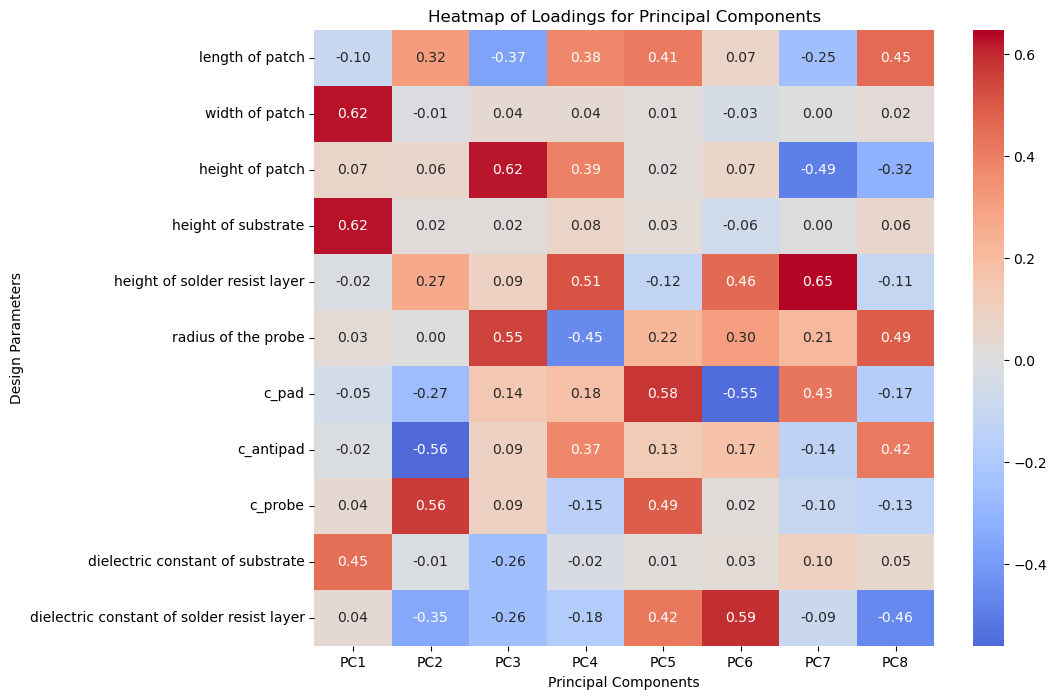

In [243]:
# Plot the loadings as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(loadings.iloc[:, :8], annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Heatmap of Loadings for Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Design Parameters")
plt.show()

The PCA loadings table and the heatmap present important information on how various design parameters affect the principal components, which indicate the main causes of data variance. We can determine which parameters are mainly responsible for variations in the design space by analyzing the loadings for each principal component (PC). This gives information about the relationship between geometry and material properties and the electromagnetic behavior of the antenna, particularly the S11 response.

The width of the patch, substrate height, and substrate dielectric constant are the main parameters influencing the first principal component (PC1), which accounts for about 20.7% of the variance. These parameters are important in determining the total variance of the design. This implies that changes in these dimensions and material qualities are probably going to have a big effect on the antenna's overall S11 performance.

With high loadings from the probe, as well as a significant negative contribution from both the solder resist layer's dielectric constant and the antipad, the second principal component (PC2), which accounts for approximately 11.1% of the variance, is heavily impacted by capacitance-related parameters. This suggests that dielectric characteristics and capacitance play a little but significant part in adjusting the electromagnetic response.

In summary, this analysis shows that a few key design parameters, like the width of the patch, the height of the substrate, and the dielectric constant of the substrate as well as the capacitance characteristics, have a major impact on the antenna’s electromagnetic behavior. These parameters have high loadings in the first few principal components, meaning they contribute significantly to the overall variance in the data and play a main role in determining the S11 response. Other factors, such as probe radius and solder resist layer thickness, also influence the behavior but are associated with more specific aspects of the response. Overall, the antenna's electromagnetic performance is influenced by a specific set of geometric and material properties.

## Part 2: Regression Modeling for S11
In this section, I aim to model the S11 response of the antenna design using linear regression. I will examine whether focussing on just a few key frequencies for simplification may provide a more effective and insightful model, since evaluating all 201 frequency points simultaneously is may be computationally intensive. Additionally, I will look at how well linear regression predicts the real and imaginary components of S11 at particular frequencies and analyze any emerging patterns.

### Research Questions
1. **Can we simplify the regression task by focusing on predicting S11 at a few key frequency points?**
2. **How effective are linear regression models in predicting the real and imaginary components of S11 based on the geometric parameters?**
3. **What patterns emerge when linear regression is applied to individual frequency points, and do these patterns suggest any broader trends in the design space?**


#### Selecting Key Frequencies
First, I will select several critical frequencies to simplify the regression task for predicting S11 values. These key frequencies are chosen based on their significance in determining antenna performance, particularly at resonance points. 

In the context of antenna design, resonance occurs when the antenna operates at a frequency where the return loss (S11 magnitude) is minimized. The antenna performs at its best at these frequencies because it sends and receives electromagnetic waves effectively so resonance frequencies are essential for examining antenna behavior.  

By focusing on resonance frequencies, I want to simplify the regression task while capturing the most significant elements of the S11 response. These frequencies are selected by identifying points where the S11 magnitude is at its lowest for different designs.

I begin by calculating the average S11 magnitude for each frequency across all designs to determine if there is a specific frequency range where the antennas perform optimally with all designs.

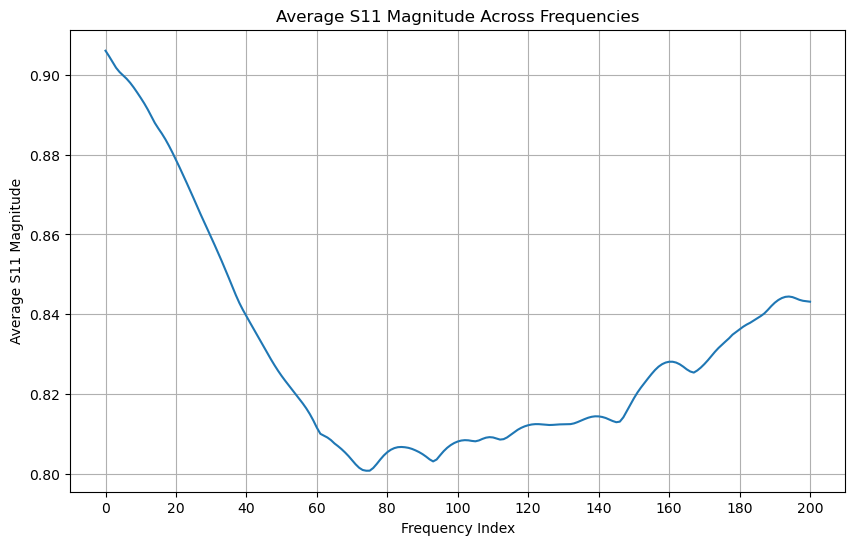

In [18]:
# Calculate the average S11 magnitude across all designs for each frequency
avg_s11_magnitude = s11_magnitude.mean(axis=0)

# Plot the average S11 magnitude
plt.figure(figsize=(10, 6))
plt.plot(avg_s11_magnitude)
plt.xticks(ticks=range(0, 201, 20))
plt.xlabel('Frequency Index')
plt.ylabel('Average S11 Magnitude')
plt.title('Average S11 Magnitude Across Frequencies')
plt.grid()
plt.show()

It is clear by looking at the average S11 magnitude across all frequencies (as displayed in the graph above) that there aren't significant variations in S11 across frequencies. Instead,  I will determine which frequency index for each design has the lowest S11 magnitude, representing the resonance frequency where the design performs best.

By identifying these minimal S11 values for each design and sorting them, I can find the most prominent resonance points. This method provides some information about the frequencies where the designs demonstrate the most significant performance and enables regression analysis on these critical points.

In [159]:
# Find the frequency index with the lowest S11 magnitude for each design
resonance_indices = s11_magnitude.idxmin(axis=1)  # Get the index of the minimum S11 for each row (design)
resonance_values = s11_magnitude.min(axis=1)      # Get the minimum S11 magnitude value for each row (design)

# Create a DataFrame to store resonance frequencies and their corresponding S11 values
resonance_table = pd.DataFrame({
    'Design': s11_magnitude.index,
    'Resonance Frequency Index': resonance_indices,
    'Minimum S11 Magnitude': resonance_values
})

# Sort the table by the Minimum S11 Magnitude in ascending order to find designs with the highest resonance peaks
resonance_table_sorted = resonance_table.sort_values(by='Minimum S11 Magnitude').reset_index(drop=True)

# Show top 15 resonance points with the lowest S11 magnitudes
resonance_table_sorted.head(15)  


,Design,Resonance Frequency Index,Minimum S11 Magnitude
0,138,71,0.005621
1,16,28,0.008276
2,26,27,0.010554
3,276,126,0.012866
4,129,155,0.015970
5,92,85,0.017633
6,371,88,0.018066
7,342,55,0.018488
8,176,172,0.019611
9,2,67,0.021490


To select the key frequencies for regression modeling, I focused on identifying frequencies with low S11 magnitudes, as these indicate resonance points where the antenna's performance is optimal. Additionally, I aimed to avoid selecting frequencies that were too close together to ensure diversity in the data and avoid redundant information. 

As a result, I chose this set of frequencies: [71, 28, 126, 155, 85, 55]

#### Linear Regression Analysis at Selected Key Frequencies

I imported the required libraries for the linear regression analysis.

In [165]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In this analysis, I use Principal Component Analysis (PCA) to address multicollinearity and reduce the complexity of the input design parameters. Some parameters in the dataset are correlated, which means that changes in one parameter can be partly predicted by changes in another. This "multicollinearity" can make the linear regression models less reliable and harder to interpret.

PCA addresses the issue of correlated parameters by transforming them into a new set of uncorrelated variables called "principal components." These components capture the main patterns in the data. In this analysis, I chose to retain the first eight principal components, as they account for approximately 80–85% of the variance. This approach allows us to maintain most of the important information from the original parameters while reducing the number of predictors. As a result, the regression models become more stable and easier to interpret.

In [255]:
# Select the top 8 principal components for reduced data representation
X_reduced = principalcomponents_input[:, :8]  # Choose the first 8 components

selected_frequencies = ["71", "28", "126", "155", "85", "55"]

# Create dictionaries to store results and coefficients for each frequency and component
results = {}
coefficients = {}

for freq in selected_frequencies:
    # Define targets for the real, imaginary, and magnitude components
    Y_real = real_data[freq]   
    Y_img = img_data[freq]   
    Y_magnitude = s11_magnitude[freq]  

    # Split the data for each component
    X_train, X_test, Y_train_real, Y_test_real = train_test_split(X_reduced, Y_real, test_size=0.2, random_state=13)
    X_train, X_test, Y_train_img, Y_test_img = train_test_split(X_reduced, Y_img, test_size=0.2, random_state=13)
    X_train, X_test, Y_train_magnitude, Y_test_magnitude = train_test_split(X_reduced, Y_magnitude, test_size=0.2, random_state=13)

    # Train models for each component
    model_real = LinearRegression().fit(X_train, Y_train_real)
    model_img = LinearRegression().fit(X_train, Y_train_img)
    model_magnitude = LinearRegression().fit(X_train, Y_train_magnitude)

    # Predict and evaluate for each component
    Y_pred_real = model_real.predict(X_test)
    Y_pred_img = model_img.predict(X_test)
    Y_pred_magnitude = model_magnitude.predict(X_test)

    mse_real = mean_squared_error(Y_test_real, Y_pred_real)
    r2_real = r2_score(Y_test_real, Y_pred_real)
    mse_img = mean_squared_error(Y_test_img, Y_pred_img)
    r2_img = r2_score(Y_test_img, Y_pred_img)
    mse_magnitude = mean_squared_error(Y_test_magnitude, Y_pred_magnitude)
    r2_magnitude = r2_score(Y_test_magnitude, Y_pred_magnitude)

    # Store results
    results[freq] = {
        'Real': {'MSE': mse_real, 'R-squared': r2_real},
        'Imaginary': {'MSE': mse_img, 'R-squared': r2_img},
        'Magnitude': {'MSE': mse_magnitude, 'R-squared': r2_magnitude}
    }

    # Store coefficients
    coefficients[freq] = {
        'Real': model_real.coef_,
        'Imaginary': model_img.coef_,
        'Magnitude': model_magnitude.coef_
    }

    print(f"Frequency {freq} - Real Part: MSE = {mse_real:.4f}, R-squared = {r2_real:.4f}")
    print(f"Frequency {freq} - Imaginary Part: MSE = {mse_img:.4f}, R-squared = {r2_img:.4f}")
    print(f"Frequency {freq} - Magnitude Part: MSE = {mse_magnitude:.4f}, R-squared = {r2_magnitude:.4f}")



Frequency 71 - Real Part: MSE = 0.1518, R-squared = 0.6323
Frequency 71 - Imaginary Part: MSE = 0.0793, R-squared = 0.0820
Frequency 71 - Magnitude Part: MSE = 0.0185, R-squared = 0.6630
Frequency 28 - Real Part: MSE = 0.1159, R-squared = 0.7788
Frequency 28 - Imaginary Part: MSE = 0.1038, R-squared = 0.0980
Frequency 28 - Magnitude Part: MSE = 0.0087, R-squared = 0.5489
Frequency 126 - Real Part: MSE = 0.0897, R-squared = 0.7941
Frequency 126 - Imaginary Part: MSE = 0.0745, R-squared = 0.1262
Frequency 126 - Magnitude Part: MSE = 0.0221, R-squared = 0.3328
Frequency 155 - Real Part: MSE = 0.0893, R-squared = 0.7990
Frequency 155 - Imaginary Part: MSE = 0.0855, R-squared = 0.3306
Frequency 155 - Magnitude Part: MSE = 0.0150, R-squared = 0.3397
Frequency 85 - Real Part: MSE = 0.1441, R-squared = 0.6495
Frequency 85 - Imaginary Part: MSE = 0.0738, R-squared = 0.0625
Frequency 85 - Magnitude Part: MSE = 0.0197, R-squared = 0.6239
Frequency 55 - Real Part: MSE = 0.1444, R-squared = 0.6661


In [265]:
# Convert results and round to 4 decimal places
results_df = pd.DataFrame(results).T.map(lambda x: {k: round(v, 4) for k, v in x.items()})

# Display results and coefficients
print("\nResults (rounded to 4 decimal places):")
print(results_df)


Results (rounded to 4 decimal places):
                                     Real  \
71   {'MSE': 0.1518, 'R-squared': 0.6323}   
28   {'MSE': 0.1159, 'R-squared': 0.7788}   
126  {'MSE': 0.0897, 'R-squared': 0.7941}   
155   {'MSE': 0.0893, 'R-squared': 0.799}   
85   {'MSE': 0.1441, 'R-squared': 0.6495}   
55   {'MSE': 0.1444, 'R-squared': 0.6661}   

                                Imaginary  \
71    {'MSE': 0.0793, 'R-squared': 0.082}   
28    {'MSE': 0.1038, 'R-squared': 0.098}   
126  {'MSE': 0.0745, 'R-squared': 0.1262}   
155  {'MSE': 0.0855, 'R-squared': 0.3306}   
85   {'MSE': 0.0738, 'R-squared': 0.0625}   
55   {'MSE': 0.1045, 'R-squared': 0.0759}   

                                Magnitude  
71    {'MSE': 0.0185, 'R-squared': 0.663}  
28   {'MSE': 0.0087, 'R-squared': 0.5489}  
126  {'MSE': 0.0221, 'R-squared': 0.3328}  
155   {'MSE': 0.015, 'R-squared': 0.3397}  
85   {'MSE': 0.0197, 'R-squared': 0.6239}  
55   {'MSE': 0.0215, 'R-squared': 0.5811}  


The linear regression analysis aimed to simplify the task of predicting S11 by focusing on key frequency points rather than trying to model all 201 frequencies simultaneously. Through this approach, we can capture critical behaviors, especially at resonance frequencies, where antenna performance is the best and most relevant. By the selected frequencies, such as 71, 28, 126, 155, 85, and 55, we can reduce computational complexity and focus on points that hold the most significant information about the antenna's electromagnetic response.

The results of the linear regression models showed different levels of effectiveness across the real, imaginary, and magnitude components of S11. For the real part, the models performed relatively well, with R-squared values ranging from around 0.63 to 0.80. For example, frequencies like 28, 126, and 155 achieved R-squared values of approximately 0.77, 0.79, and 0.80, respectively. This implies that a significant amount of S11's variance can be captured by linear regression as the real part of the data has a strong linear relationship with the geometric parameters.

In contrast, the imaginary part of S11 was more challenging to predict accurately. The majority of frequencies had low R-squared values, often less than 0.35, showing that the imaginary part was difficult for the linear regression models to capture. Although frequencies like 126 and 155 showed slightly better performance, in general, the results imply that linear models might not be appropriate for the imaginary part. The imaginary part of S11 may depend on more complex, possibly non-linear interactions within the design parameters. 

The magnitude of S11 showed moderate success, with R-squared values generally between 0.33 and 0.66. Some frequencies, such as 71 and 85, showed relatively higher R-squared values of 0.66 and 0.62, respectively, indicating that the model could explain over 60% of the variance in the S11 magnitude at these frequencies. This suggests that while linear regression captures some important relationships within the design space for the magnitude component, it may still miss certain complexities. 


In [267]:
# Convert coefficients to a DataFrame with MultiIndex for clearer organization
coefficients_dict = {(freq, comp): coef for freq, comps in coefficients.items() for comp, coef in comps.items()}
coefficients_df = pd.DataFrame(coefficients_dict).T
coefficients_df.columns = [f'PC{i+1}' for i in range(coefficients_df.shape[1])]

# Display coefficients with MultiIndex format
print("\nCoefficients of Principal Components for Each Component at Each Frequency:\n")
coefficients_df.style.set_table_attributes('style="width:100%"').set_caption("Coefficients for Each Frequency and Component")


Coefficients of Principal Components for Each Component at Each Frequency:



Analyzing the linear regression coefficients across different frequencies, several patterns emerge, providing insights into how each principal component (PC) influences the S11 response. Certain principal components such as PC1 and PC2, consistently show larger coefficient values across most frequencies, particularly for the real part of the S11 response. This indicates that these components capture fundamental design parameters that broadly influence the antenna's behavior across the frequency spectrum. Specifically, PC1 and PC2 are affected by design parameters such as the width of the patch, the height of the substrate, the dielectric constant of the substrate, and the capacitance characteristics. From these regression results, we can conclude that these design parameters have a substantial impact on the electromagnetic behavior of the antenna. Components like PC3 and PC4, on the other hand, show more variable coefficients that affect particular frequencies, particularly in the imaginary part. This indicates that they represent more subtle elements of the design.

This pattern suggests that some key design elements influence a broad spectrum of frequencies, but other parameters have special effects at particular frequencies. This relationship shows that optimizing the main fundamental components may improve overall performance while changing specific components can fine-tune behavior at specific frequencies.

## Model Performance and Interpretability:

PCA and regression models each contribute to simplifying and predicting the antenna's performance in different ways. PCA effectively decreases the complexity of the design space by translating the original, potentially correlated design parameters into a set of uncorrelated principle components. By focusing on the top principal components that capture the most variation, we can keep the most important information from the original dataset while reducing dimensionality. Regression models become more interpretable as a result of the removal of redundant or correlated information.

These principal components are then used as predictors in regression models, particularly linear regression, to estimate the S11 response at particular frequencies. PCA reduces multicollinearity in the data, allowing regression models to accurately predict S11 values. 

Also, PCA determines the primary causes of variance in data by ranking the principal components. Regression models then use these components to directly correlate them to S11 responses, allowing us to see which design elements have the most impact on performance at specific frequencies. This combination helps to identify the design parameters that have the most influence on the antenna's performance.

The primary limitation of this PCA and linear regression approach is the assumption of linear relationships. Since electromagnetic behavior is frequently complicated and nonlinear in reality, linear regression could miss parameter interactions that affect performance at particular frequencies. Furthermore, while PCA decreases dimensionality, it may miss some non-linear correlations in the data because it only considers linear combinations of variables.

Nonlinear models, such as decision trees, random forests, or neural networks, can capture more complex relationships between design parameters, and they can increase accuracy. Using nonlinear dimensionality reduction methods, such as kernel PCA, can expose hidden structures in the data that  PCA is unable to detect. These methods could help create models that capture the complex and nonlinear features of the antenna's electromagnetic response in a better way.

*In completing this homework, I utilized ChatGPT to assist in generating code snippets and Grammarly to check for grammatical accuracy and clarity in the report text. All outputs from these tools were carefully reviewed and modified.* 